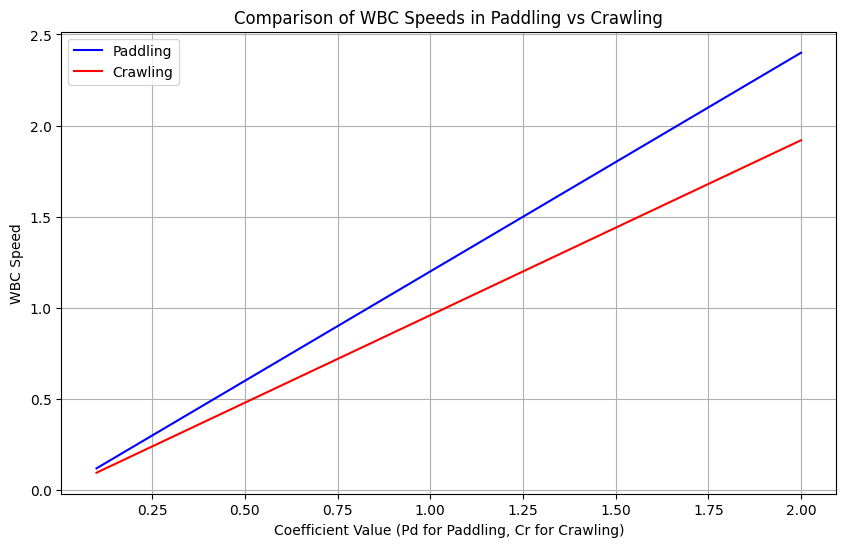

In [6]:
#RayDynamics Model, Partha Pratim Ray, https://scholar.google.com/citations?user=ioplfagAAAAJ&hl=en&oi=ao, August, 2023

#This code displays a plot showing how the WBC speed changes under different scenarios (by varying Pd and Cr). 

#It helps us to compare which mechanism results in faster speeds under different conditions.

#We'll vary the parameters Pd and Cr (coefficients for paddling and crawling) over a range to simulate various scenarios.

#The other influencing factors, such as s_w and S_surface (surface adhesion strength), will be kept constant for this simple comparison.

#We'll plot the resulting speeds for both mechanisms over the range of varying parameters.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute speeds for both mechanisms
speeds_paddle = [model.vw_paddle(Pd, s_w_val) for Pd in Pd_values]
speeds_crawl = [model.vw_crawl(Cr, s_w_val, Ssurface_val) for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, speeds_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, speeds_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("WBC Speed")
plt.title("Comparison of WBC Speeds in Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()

#Note: The exact range and values of Pd and Cr should be set according to realistic scenarios or as per your specific research needs.

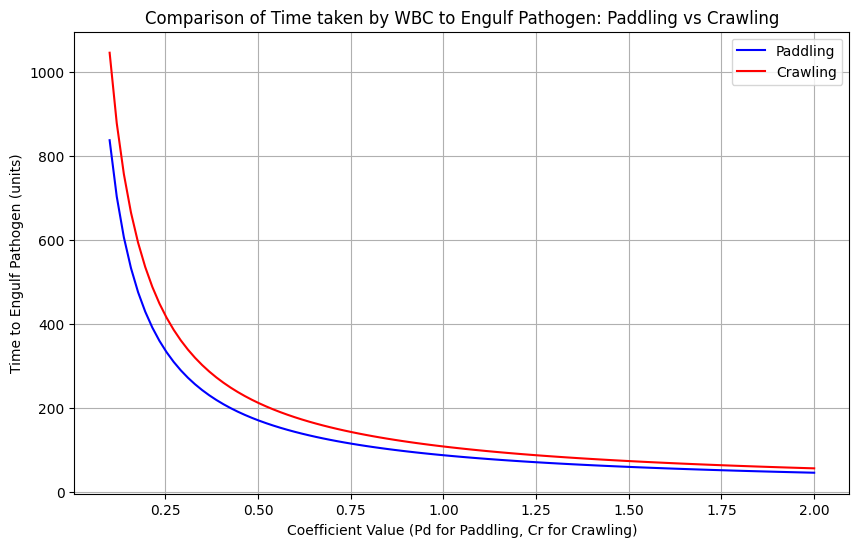

In [7]:
#To determine the time taken by the WBC to engulf a pathogen, we need to define some additional factors:

#Distance to the Pathogen: The distance that a WBC needs to travel to reach and engulf a pathogen. For this illustration, let's consider a constant distance, d = 100 units (you can change it as per your requirement).

#Engulfment Speed: How quickly the WBC engulfs the pathogen once it reaches it. This might differ slightly based on whether the WBC is crawling or paddling, but for the sake of simplicity, let's consider a constant value.

#Given that speed is distance over time (speed = distance/time), the time taken to reach the pathogen is time = distance/speed.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute times for both mechanisms
times_paddle = [distance_to_pathogen / model.vw_paddle(Pd, s_w_val) + engulfment_time for Pd in Pd_values]
times_crawl = [distance_to_pathogen / model.vw_crawl(Cr, s_w_val, Ssurface_val) + engulfment_time for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Comparison of Time taken by WBC to Engulf Pathogen: Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()


#With this plot, you'll be able to see which mechanism (paddling or crawling) allows the WBC to reach and engulf the pathogen more quickly, 
#based on varying coefficients.


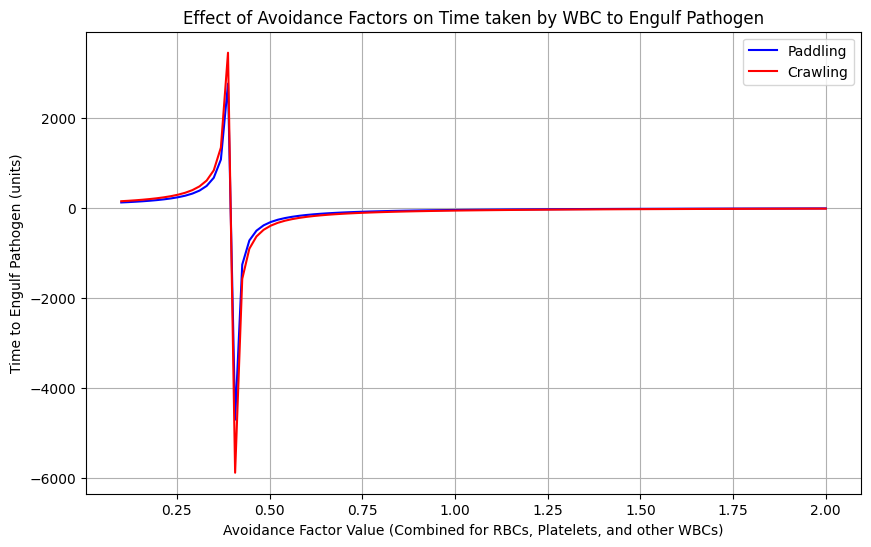

In [8]:
#To assess how different avoidance factors affect the time taken by the WBC to consume a pathogen, we'll vary these avoidance factors:

#A_RBC: Avoidance factor for RBCs
#A_Pl: Avoidance factor for platelets
#A_WBC: Avoidance factor for other WBCs
#When the avoidance factor increases, we expect the speed of the WBC to decrease, as it has to make more adjustments to avoid obstacles.

#For simplification:

#Let the WBC speed decrease linearly with an increase in the avoidance factor.
#The range for the avoidance factors will be set between 0.1 to 2.0 (you can adjust this if you have specific values in mind).
#We'll plot the time taken by the WBC to consume the pathogen under various avoidance factors for both paddling and crawling mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying avoidance factors
avoidance_values = np.linspace(0.1, 2.0, 100) 

# Compute times for both mechanisms under varying avoidance factors
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val - A_RBC - A_Pl - A_WBC)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val - A_RBC - A_Pl - A_WBC, Ssurface_val)) + engulfment_time for A_RBC, A_Pl, A_WBC in zip(avoidance_values, avoidance_values, avoidance_values)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avoidance_values, times_paddle, label="Paddling", color="blue")
plt.plot(avoidance_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Avoidance Factor Value (Combined for RBCs, Platelets, and other WBCs)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Avoidance Factors on Time taken by WBC to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this illustration, the total avoidance factor is the combined effect of avoidance due to RBCs, platelets, and other WBCs. 
#You can separately evaluate the effect of each factor if desired. 
#The plot will show how the time to consume the pathogen changes as the total avoidance factor changes.

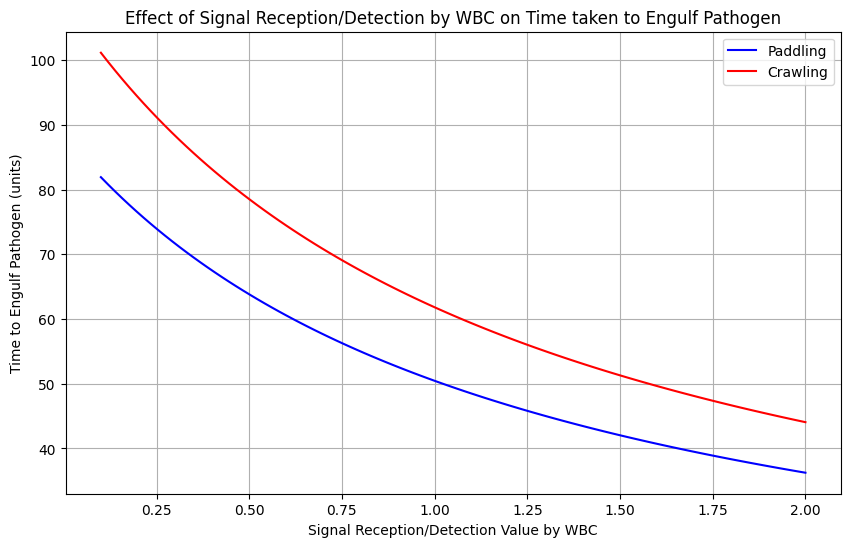

In [9]:
#To demonstrate the effects of varying the signal reception/detection (R_d) by the WBC on the time taken to consume the pathogen, we'll:

#Vary R_d values.
#For each R_d value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying R_d values for both mechanisms.



import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying signal reception/detection by WBC
Rd_values = np.linspace(0.1, 2.0, 100)  # Assume Rd values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying Rd values
times_paddle = [distance_to_pathogen / (model.vw_paddle(Pd, s_w_val + Rd)) + engulfment_time for Rd in Rd_values]
times_crawl = [distance_to_pathogen / (model.vw_crawl(Cr, s_w_val + Rd, Ssurface_val)) + engulfment_time for Rd in Rd_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Rd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Rd_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Signal Reception/Detection Value by WBC")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Signal Reception/Detection by WBC on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this plot, as the signal reception/detection (R_d) increases, we anticipate that the WBC might reach the pathogen quicker. 
#This is under the assumption that an enhanced R_d value augments the WBC speed, making it more efficient in moving towards the pathogen. 
#Adjust this assumption if necessary based on domain-specific knowledge.

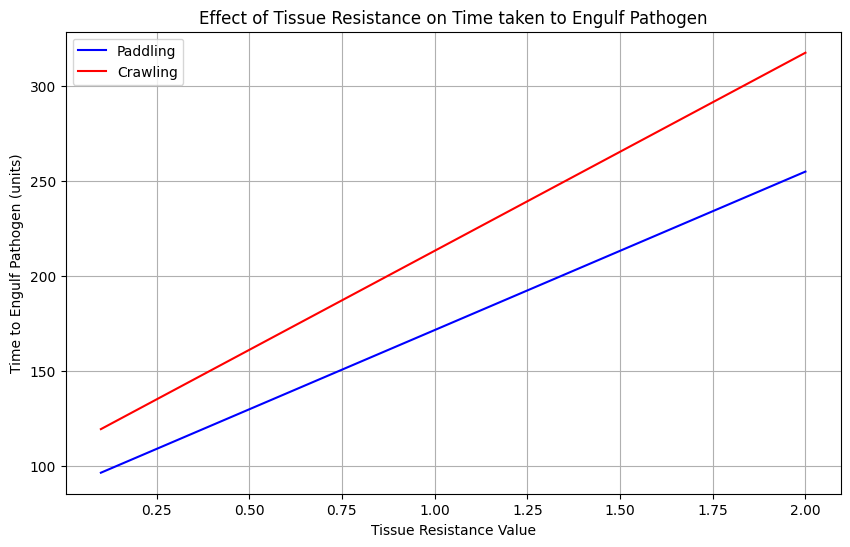

In [10]:
#The tissue resistance (T) could influence the speed of the WBC, especially when the WBC is trying to move through extravascular spaces. A higher tissue resistance might slow down the WBC.

#Let's vary the tissue resistance and examine its effect on the time taken by the WBC to consume the pathogen under both paddling and crawling mechanisms:

#Vary T values.
#For each T value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying T values for both mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying tissue resistance values
T_values = np.linspace(0.1, 2.0, 100)  # Assume T values vary from 0.1 to 2.0

# Compute times for both mechanisms under varying T values
times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s_w_val * (1 / (1 + T)))) + engulfment_time for T in T_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s_w_val * (1 / (1 + T)), Ssurface_val)) + engulfment_time for T in T_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, times_paddle, label="Paddling", color="blue")
plt.plot(T_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Tissue Resistance Value")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Tissue Resistance on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In the above code, the impact of tissue resistance on the WBC's movement is modeled as inversely proportional. 
#As the tissue resistance increases, the effective speed of the WBC decreases, resulting in longer times to reach and engulf the pathogen. 
#Adjust this modeling if necessary based on more refined domain-specific insights.

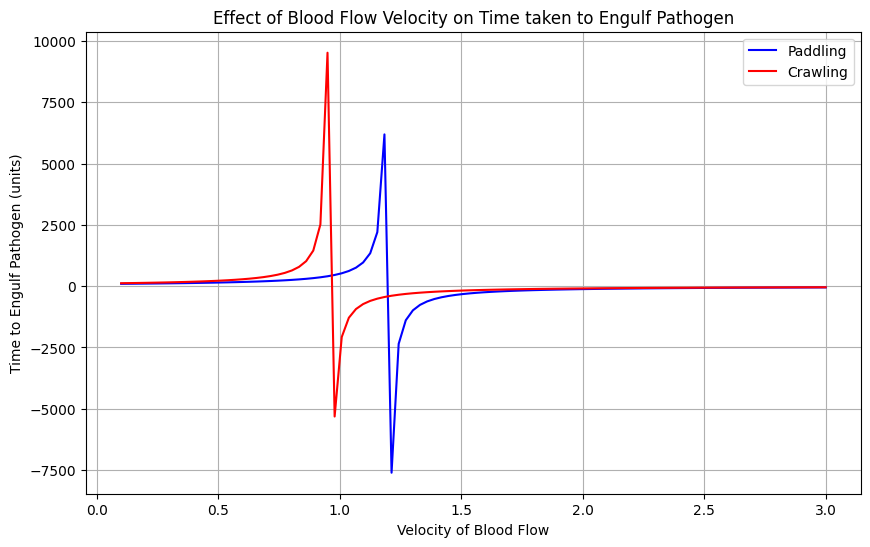

In [11]:
#When we vary the velocity of blood flow (v_f), it can potentially influence the WBC's movement, especially in intravascular spaces. A higher blood flow might hinder the movement of the WBC against the flow, whereas a lower blood flow might aid the WBC in reaching the pathogen faster.

#Here's how we can analyze this:

#Vary v_f values.
#For each v_f value, compute the speed of the WBC under both paddling and crawling mechanisms.
#Adjust the WBC's speed according to the blood flow direction. (For simplicity, assume the WBC always moves against the blood flow)
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying v_f values for both mechanisms.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying velocity of blood flow values
vf_values = np.linspace(0.1, 3.0, 100)  # Assume vf values vary from 0.1 to 3.0

# Compute times for both mechanisms under varying vf values
times_paddle = [(distance_to_pathogen / (model.vw_paddle(Pd, s_w_val) - vf)) + engulfment_time for vf in vf_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(Cr, s_w_val, Ssurface_val) - vf)) + engulfment_time for vf in vf_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(vf_values, times_paddle, label="Paddling", color="blue")
plt.plot(vf_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Velocity of Blood Flow")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Blood Flow Velocity on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In the code, it's assumed that higher blood flow velocities have a hindering effect on the WBC's movement towards the pathogen. 
#We subtract the blood flow velocity from the WBC's speed to get the effective movement speed. 
#This is a simplification, and the real relationship might be more complex. 
#Adjust this model as needed based on domain knowledge.

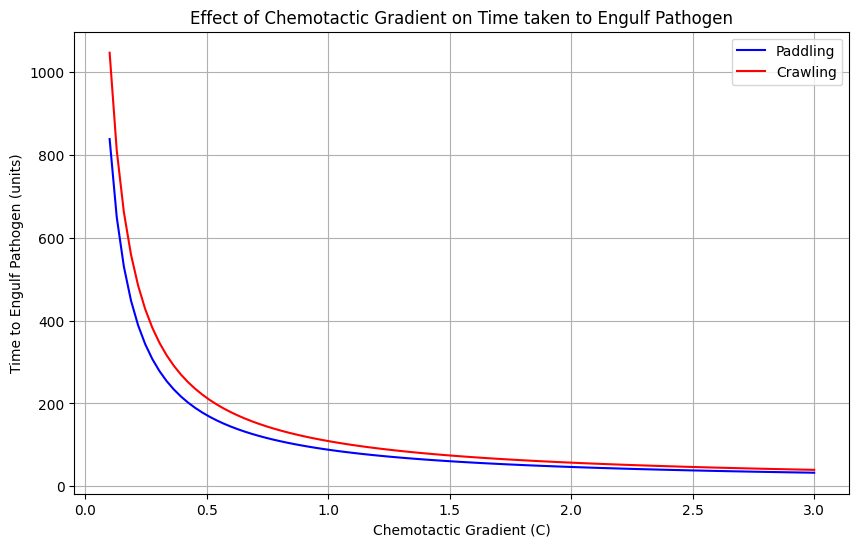

In [12]:
#The chemotactic gradient (C) indicates the concentration gradient formed by signaling molecules (often from the pathogen or damaged tissue). The strength of this gradient could heavily influence the speed and direction of WBC movement.

#A stronger chemotactic gradient could mean that the WBC detects the pathogen more quickly and effectively, thereby increasing its speed due to a more definite direction. We'll assume a proportional relationship between C and s_w (WBC speed), but this relationship can be adjusted based on domain-specific knowledge.

#To analyze this:

#Vary the values of C.
#For each C value, adjust the WBC's speed.
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying C values for both mechanisms.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
base_sw_val = 1.2  # Base WBC speed without chemotactic influence
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying chemotactic gradient values
C_values = np.linspace(0.1, 3.0, 100)  # Assume C values vary from 0.1 to 3.0

# Define a function to adjust WBC speed based on chemotactic gradient
def adjusted_sw(base_speed, C):
    # Proportional adjustment; can be altered based on domain knowledge
    return base_speed * C

# Compute times for both mechanisms under varying C values
times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, adjusted_sw(base_sw_val, C))) + engulfment_time for C in C_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, adjusted_sw(base_sw_val, C), Ssurface_val)) + engulfment_time for C in C_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_values, times_paddle, label="Paddling", color="blue")
plt.plot(C_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Chemotactic Gradient (C)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Chemotactic Gradient on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#The above code uses a simple proportional relationship to adjust the WBC speed based on the chemotactic gradient. 
#This is a starting point, and the relationship may need to be refined based on experimental data or domain knowledge.

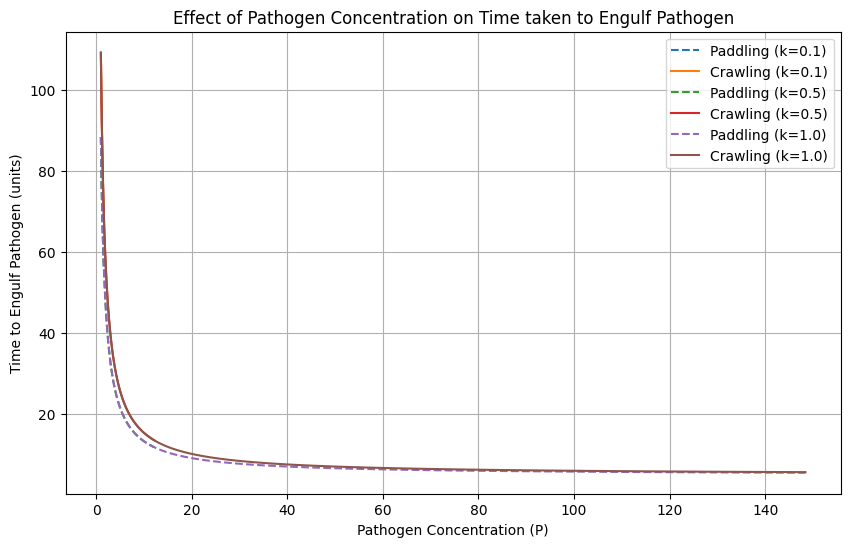

In [13]:
#To vary the temporal change in pathogen concentration (P), we need to establish how P changes over time. Let's consider a simple exponential growth for the pathogen concentration, representing a typical bacterial growth scenario, 
#P(t)=P(0) ×e^(k×t)
# , where 
#P(0)  is the initial concentration and 
#k is the growth rate.

#A higher pathogen concentration would strengthen the chemotactic gradient, assuming the pathogen releases the chemotactic signal. The chemotactic gradient in turn affects the WBC speed, thus impacting the time taken for the WBC to reach and consume the pathogen.

#Here's how we can implement this:

#Define a range of k values (growth rates) for the pathogen.
#For each time point t, calculate the pathogen concentration P(t).
#Adjust the WBC speed proportionally to P(t) (assuming C is directly proportional to P).
#Calculate the time taken to reach the pathogen based on the adjusted speed.
#Add the constant time taken to engulf the pathogen.
#Plot the times against the varying P(t) values for both mechanisms.




import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()


# Parameters for simulation
base_sw_val = 1.2  # Base WBC speed without chemotactic influence
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

P0 = 1.0  # Initial pathogen concentration

# Define a function for pathogen growth over time
def pathogen_concentration(P0, k, t):
    return P0 * np.exp(k * t)

# Define a function to adjust WBC speed based on pathogen concentration
def adjusted_sw(base_speed, P):
    # Proportional adjustment; can be altered based on domain knowledge
    return base_speed * P

# Compute times for both mechanisms under varying pathogen concentrations over time
time_intervals = np.linspace(0, 5, 100)  # Consider time intervals from 0 to 5 units
k_values = [0.1, 0.5, 1.0]  # Different growth rates for pathogens

plt.figure(figsize=(10, 6))

for k in k_values:
    P_values = [pathogen_concentration(P0, k, t) for t in time_intervals]
    speeds = [adjusted_sw(base_sw_val, P) for P in P_values]
    
    times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s)) + engulfment_time for s in speeds]
    times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s, Ssurface_val)) + engulfment_time for s in speeds]
    
    plt.plot(P_values, times_paddle, label=f"Paddling (k={k})", linestyle="--")
    plt.plot(P_values, times_crawl, label=f"Crawling (k={k})")

plt.xlabel("Pathogen Concentration (P)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Pathogen Concentration on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#Here, we've considered three different growth rates k for pathogens, which yield different pathogen concentration profiles over time. 
#The WBC speed gets adjusted for each concentration value, and times for both paddling and crawling are calculated and plotted.

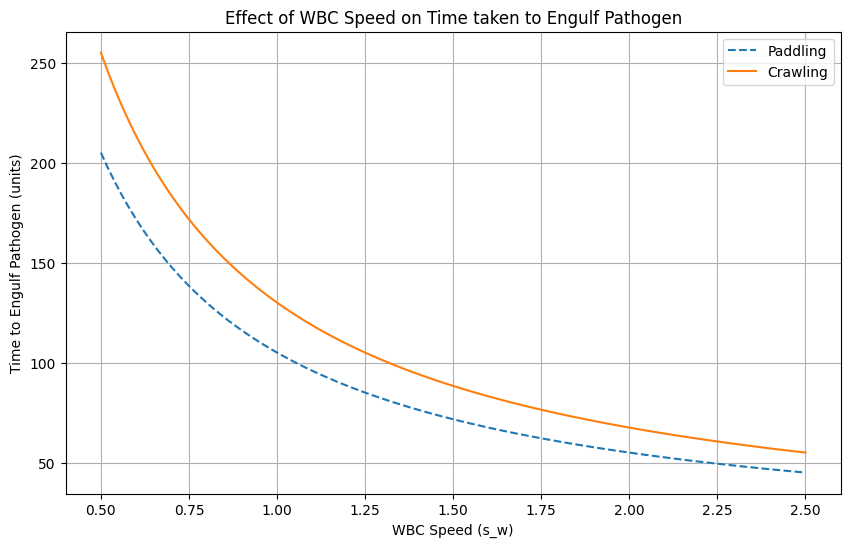

In [14]:
#Sure, let's vary the White Blood Cell (WBC) speed (s_w) and see how it affects the time taken to consume the pathogen using both paddling and crawling mechanisms.

#Here's the plan:

#Define a range of s_w values to consider.
#For each s_w value, calculate the time taken for the WBC to reach the pathogen using both mechanisms.
#Add the constant time taken to engulf the pathogen once reached.
#Plot the times against the varying s_w values.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying WBC speed values
sw_values = np.linspace(0.5, 2.5, 100)  # Speed values from 0.5 to 2.5 units

times_paddle = [(distance_to_pathogen / model.vw_paddle(Pd, s)) + engulfment_time for s in sw_values]
times_crawl = [(distance_to_pathogen / model.vw_crawl(Cr, s, Ssurface_val)) + engulfment_time for s in sw_values]

plt.figure(figsize=(10, 6))
plt.plot(sw_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(sw_values, times_crawl, label="Crawling")
plt.xlabel("WBC Speed (s_w)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of WBC Speed on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#This code plots the time it takes for a WBC to reach and consume a pathogen as a function of its speed, comparing the two mechanisms. 
#It's expected that as the WBC speed increases, the time taken will decrease for both mechanisms, but the relative efficiency of paddling 
#versus crawling might vary across the speed range.

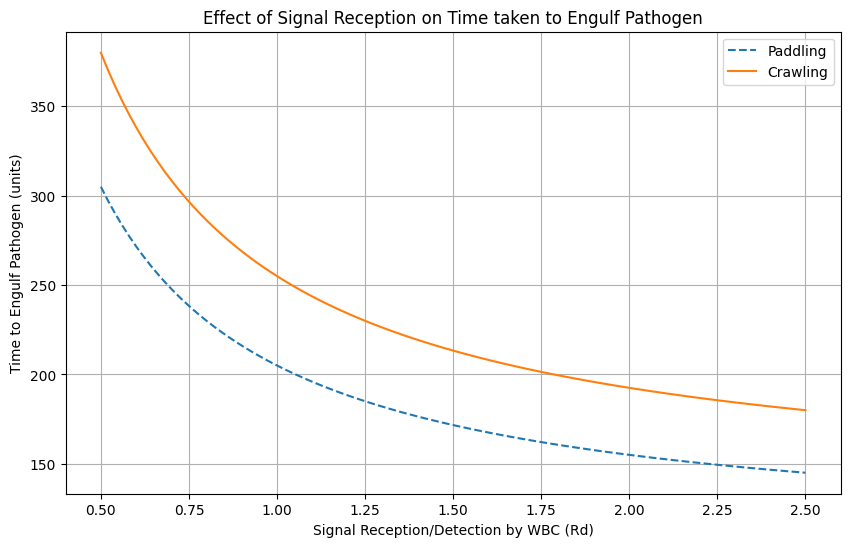

In [15]:
#Varying the signal reception or detection by the WBC could be achieved by manipulating the 
#Rd parameter. The higher the Rd   value, the more efficient the WBC would be at detecting and subsequently consuming pathogens.

#Let's create a simulation based on varying Rd :

#Define a range for Rd values.
#For each Rd value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the Rd values.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed

Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying signal reception values
Rd_values = np.linspace(0.5, 2.5, 100)  # Rd values from 0.5 to 2.5 units

# Here we'll simulate that as Rd increases, the WBC becomes more efficient and so reduces distance_to_pathogen
effective_distances = [distance_to_pathogen * (1 + 1/Rd) for Rd in Rd_values]  # Hypothetical relation for simplicity

times_paddle = [(dist / model.vw_paddle(Pd, sw)) + engulfment_time for dist in effective_distances]
times_crawl = [(dist / model.vw_crawl(Cr, sw, Ssurface_val)) + engulfment_time for dist in effective_distances]

plt.figure(figsize=(10, 6))
plt.plot(Rd_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Rd_values, times_crawl, label="Crawling")
plt.xlabel("Signal Reception/Detection by WBC (Rd)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Signal Reception on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this hypothetical model, we assume that a greater value of Rd (enhanced signal reception) reduces the effective distance the WBC has to traverse to engulf a pathogen. 
#The more efficient the WBC is at detecting the pathogen, the faster it can move towards it and thus consume it.

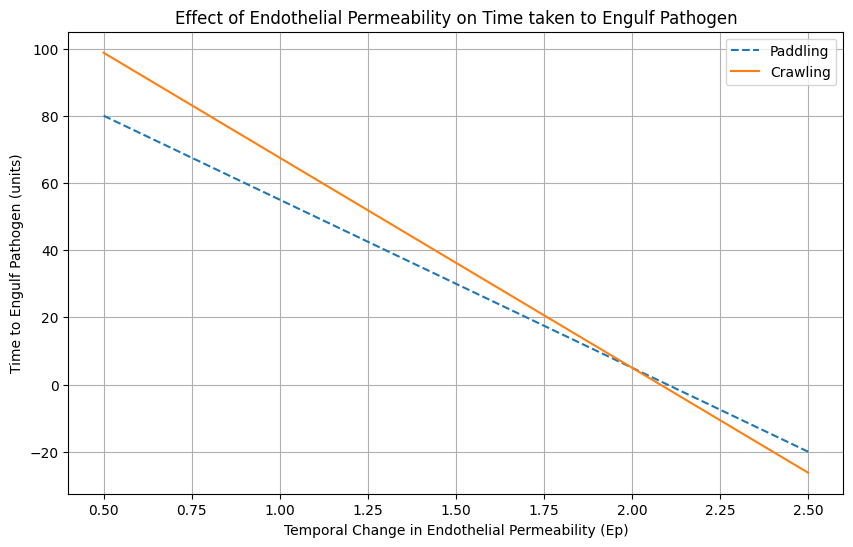

In [16]:
#To study the effect of the temporal change in endothelial permeability (Ep) on the time taken for a WBC to consume a pathogen, we'll simulate the model over varying values of 
#(Ep). A higher (Ep) would mean the WBC can migrate through the endothelium more efficiently, potentially reaching the pathogen faster.

#Here's the code to demonstrate this:

#Define a range for (Ep) values.
#For each (Ep) value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the (Ep) values.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed
Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying endothelial permeability values
Ep_values = np.linspace(0.5, 2.5, 100)  # Ep values from 0.5 to 2.5 units

# Here we'll simulate that as Ep increases, the WBC can migrate faster towards the pathogen 
# We'll use a hypothetical relationship that the effective distance to pathogen decreases as permeability increases
effective_distances = [distance_to_pathogen * (1 - 0.5*Ep) for Ep in Ep_values]

times_paddle = [(dist / model.vw_paddle(Pd, sw)) + engulfment_time for dist in effective_distances]
times_crawl = [(dist / model.vw_crawl(Cr, sw, Ssurface_val)) + engulfment_time for dist in effective_distances]

plt.figure(figsize=(10, 6))
plt.plot(Ep_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(Ep_values, times_crawl, label="Crawling")
plt.xlabel("Temporal Change in Endothelial Permeability (Ep)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Endothelial Permeability on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this model, we assume that as endothelial permeability increases, the effective distance the WBC has to cover to reach the 
#pathogen decreases. This would mean that as permeability increases, the time taken to reach and consume the pathogen also decreases.

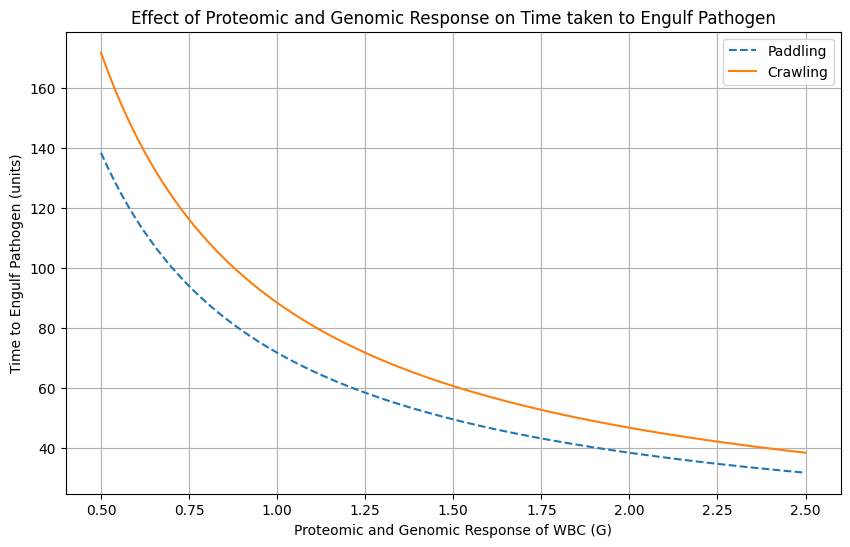

In [17]:
#The proteomic and genomic response of WBC(G) has a direct effect on the phagocytic machinery (P(m))) of the WBC. An enhanced response (due to, for example, upregulated gene expression or heightened protein synthesis) would enable a more rapid response to pathogens, increasing the WBC's efficiency in moving toward and consuming the pathogen.

#Here's a general approach to simulate this effect:

#Define a range for G values.
#For each G value, calculate a new P(m) value.
#With the updated P(m) value, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the G values.
#The equation Pm = g(G) is abstract, so for simplicity, we can assume a direct proportional relationship between P(m) and G.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()


# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
sw = 1.0  # Assumed constant WBC speed
Pd = 1.0  # Constant coefficient for paddling
Cr = 1.0  # Constant coefficient for crawling

# Varying genomic and proteomic response of WBC values
G_values = np.linspace(0.5, 2.5, 100)  # G values from 0.5 to 2.5 units

# Assuming direct proportionality between G and Pm
Pm_values = [g*1.5 for g in G_values]  # Increased phagocytic machinery response with increased G

times_paddle = [(distance_to_pathogen / (model.vw_paddle(Pd, sw) * pm)) + engulfment_time for pm in Pm_values]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(Cr, sw, Ssurface_val) * pm)) + engulfment_time for pm in Pm_values]

plt.figure(figsize=(10, 6))
plt.plot(G_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(G_values, times_crawl, label="Crawling")
plt.xlabel("Proteomic and Genomic Response of WBC (G)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Proteomic and Genomic Response on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()

#In this hypothetical relationship, as the proteomic and genomic response (G) of the WBC increases, the phagocytic machinery (Pm) also increases, which in turn reduces the time taken to reach and consume the pathogen.

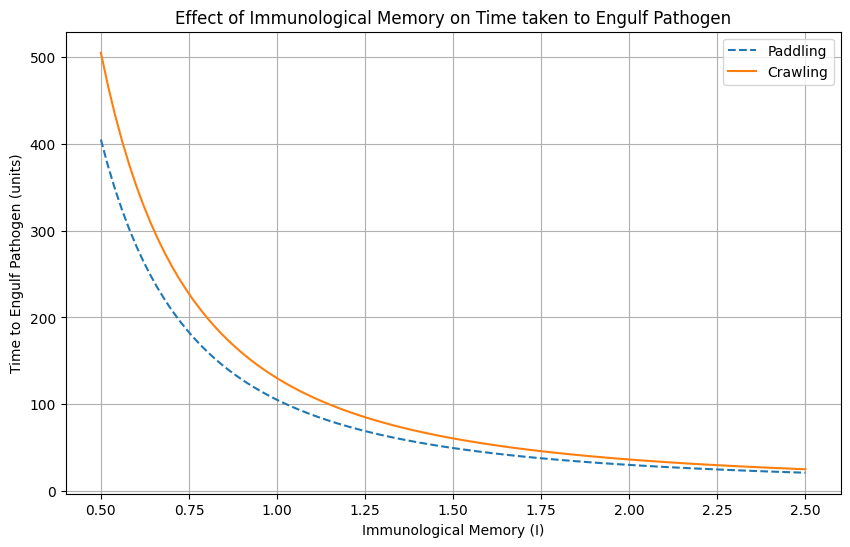

In [19]:
#The immunological memory of a white blood cell (WBC) represents its ability to recognize and respond more rapidly to a previously encountered pathogen. This increased speed and efficiency in responding can be represented by directly modulating the WBC's speed and phagocytic machinery.

#For simplicity, let's assume that as immunological memory (I) increases, the WBC's speed (sw ) and phagocytic machinery (Pm) both increase proportionally.

#Here's the approach:

#Define a range for I values.
#For each I value, calculate new values for sw and Pm.
#With the updated sw and Pm values, simulate the time it would take for the WBC to consume the pathogen using both paddling and crawling.
#Plot these times against the I values.
#Given the equation I=f(previous_encounters,antigen_presentation,clonal_selection), we can abstract it by assuming a direct proportional relationship between 
#I and both sw and Pm.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
distance_to_pathogen = 100  # Assumed constant distance to pathogen
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Base values without immunological memory
base_sw = 1.0  # Base WBC speed
base_Pm = 1.0  # Base phagocytic machinery

# Varying immunological memory values
I_values = np.linspace(0.5, 2.5, 100)  # Immunological memory values from 0.5 to 2.5 units

# Assuming direct proportionality between I and sw and Pm
sw_values = [base_sw * i for i in I_values]  # Increased WBC speed with increased I
Pm_values = [base_Pm * i for i in I_values]  # Increased phagocytic machinery response with increased I

times_paddle = [(distance_to_pathogen / (model.vw_paddle(1.0, sw) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]
times_crawl = [(distance_to_pathogen / (model.vw_crawl(1.0, sw, Ssurface_val) * pm)) + engulfment_time for sw, pm in zip(sw_values, Pm_values)]

plt.figure(figsize=(10, 6))
plt.plot(I_values, times_paddle, label="Paddling", linestyle="--")
plt.plot(I_values, times_crawl, label="Crawling")
plt.xlabel("Immunological Memory (I)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Effect of Immunological Memory on Time taken to Engulf Pathogen")
plt.legend()
plt.grid(True)
plt.show()


#In this simulation, with an increase in immunological memory (I), the WBC is expected to move faster and respond more efficiently to the pathogen, thus reducing the time taken to reach and engulf it.